In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('cleaned_loan_data.csv')

In [3]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,0,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,1,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,1,0,0


In [4]:
data_lgr=data.copy()

In [5]:
data_scaled=data_lgr.copy()

In [6]:
from sklearn.preprocessing import StandardScaler
scaling_col=['Age','Income','LoanAmount','CreditScore','NumCreditLines','MonthsEmployed','InterestRate','LoanTerm','DTIRatio']
scaler=StandardScaler()

scaler.fit(data_scaled[scaling_col])

# Transform the specified columns
data_scaled[scaling_col] = scaler.transform(data_scaled[scaling_col])

In [7]:
X=data_scaled.drop('Default',axis=1)
y=data_scaled['Default']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [27]:
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,f1_score,recall_score,confusion_matrix,roc_curve

# LOGISTIC MODEL

In [30]:
from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression()
lgr.fit(X_train,y_train)

y_pred=lgr.predict(X_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))

accuracy:  0.8844834747522696
precision:  0.6163021868787276
f1_score:  0.05988023952095808
recall:  0.03146888640747132
auc:  0.5144376442142982


<Axes: >

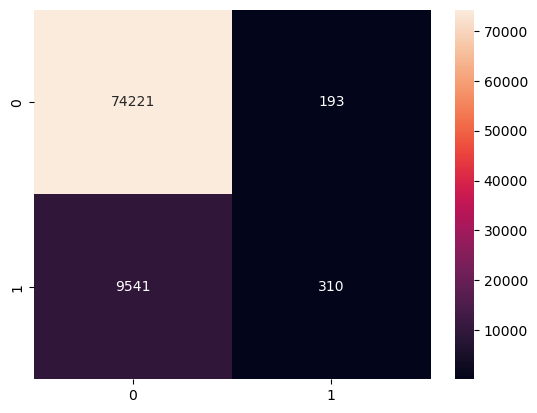

In [31]:
cfc=confusion_matrix(y_test,y_pred)
sns.heatmap(cfc,annot=True,fmt='.0f')

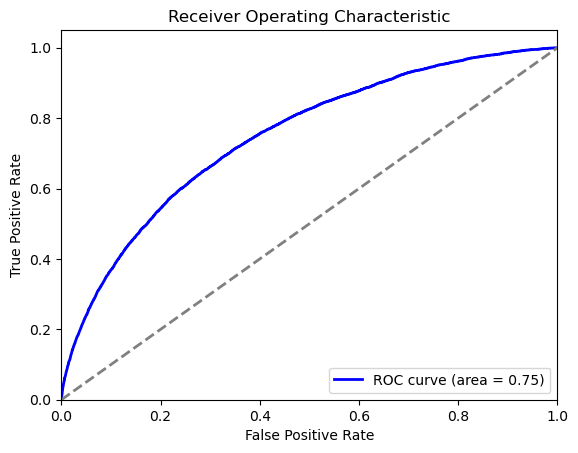

In [35]:
y_pred = lgr.predict(X_test)
y_pred_proba = lgr.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

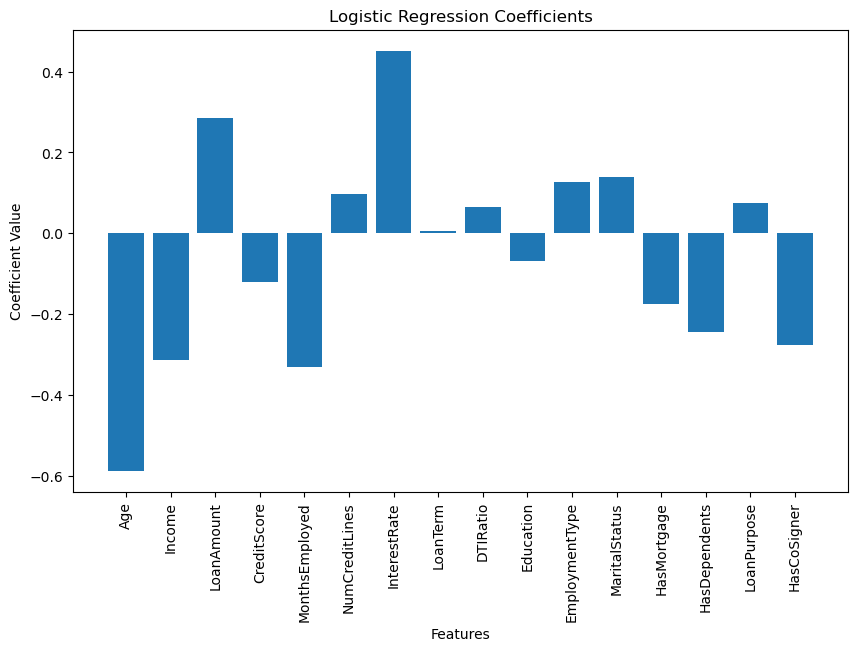

In [75]:
coefficients = lgr_ros.coef_[0]
cols=X.columns
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x=cols, height=coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

In [78]:
X_new=X[['Age','Income','LoanAmount','MonthsEmployed','InterestRate','HasDependents','HasCoSigner']]

In [79]:
X_new

,Age,Income,LoanAmount,MonthsEmployed,InterestRate,HasDependents,HasCoSigner
0,0.833990,0.089693,-1.086833,0.590533,0.261771,1,1
1,1.701221,-0.823021,-0.044309,-1.285731,-1.308350,0,1
2,0.166888,0.043854,0.022715,-0.968209,1.156831,1,0
3,-0.767053,-1.303452,-1.168538,-1.718715,-0.967805,0,0
4,1.100830,-1.592855,-1.671921,-1.487790,-1.052188,1,0
...,...,...,...,...,...,...,...
255342,-1.634285,-1.142632,1.173101,1.427636,0.093006,0,0
255343,-0.767053,-0.783984,0.879724,-1.314597,-0.292744,0,0
255344,0.833990,0.059562,1.139391,0.301877,-1.236022,1,1
255345,-0.099952,0.066979,-0.945840,-0.564091,1.116146,1,0


In [81]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y,random_state=42,test_size=0.33)


lgr=LogisticRegression()
lgr.fit(X_train_new,y_train_new)

y_pred=lgr.predict(X_test_new)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))

accuracy:  0.8839257105559841
precision:  0.5988700564971752
f1_score:  0.041548260656540915
recall:  0.021520657801238453
auc:  0.5098062073643491


# LOGISTIC WITH OVERSAMPLING

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

X_ros,y_ros=ros.fit_resample(X_train,y_train)


In [22]:
lgr_ros=LogisticRegression()
lgr_ros.fit(X_ros,y_ros)

y_pred=lgr_ros.predict(X_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))

accuracy:  0.6736130065863645
precision:  0.2178388746803069
f1_score:  0.33133159903722254
recall:  0.6917064257435793
auc:  0.6814621036719078


<Axes: >

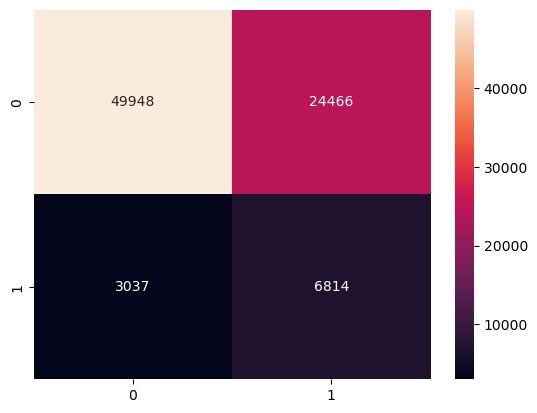

In [23]:
cfc=confusion_matrix(y_test,y_pred)
sns.heatmap(cfc,fmt='.0f',annot=True)

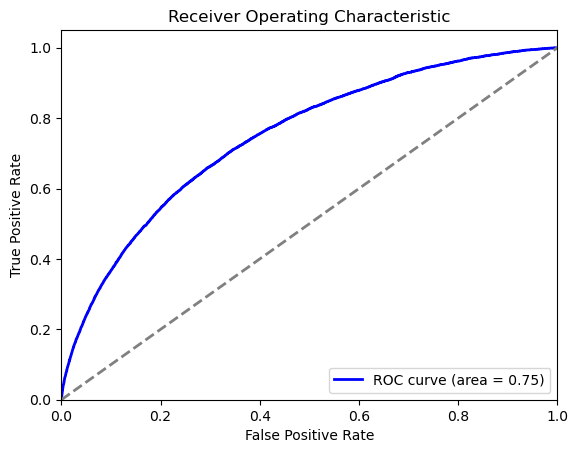

In [33]:
y_pred = lgr_ros.predict(X_test)
y_pred_proba = lgr_ros.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [82]:
X_ros_new,y_ros_new=ros.fit_resample(X_train_new,y_train_new)

In [83]:
lgr=LogisticRegression()
lgr.fit(X_ros_new,y_ros_new)

y_pred=lgr.predict(X_test_new)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))

accuracy:  0.6681303032101109
precision:  0.21311371555273995
f1_score:  0.3248593708505348
recall:  0.682976347578926
auc:  0.6745706582681902


# LOGISTIC WITH UNDERSAMPLING

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)

X_rus,y_rus=rus.fit_resample(X_train,y_train)

lgr_rus=LogisticRegression()
lgr_rus.fit(X_rus,y_rus)

y_pred=lgr_rus.predict(X_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))

accuracy:  0.6731027116833798
precision:  0.21766601780642691
f1_score:  0.3312129746528115
recall:  0.6924170135011674
auc:  0.6814814392632829


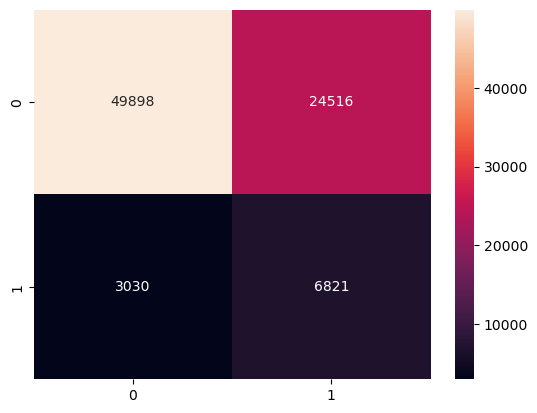

In [38]:
cfc=confusion_matrix(y_test,y_pred)
sns.heatmap(cfc,fmt='.0f',annot=True)
plt.show()

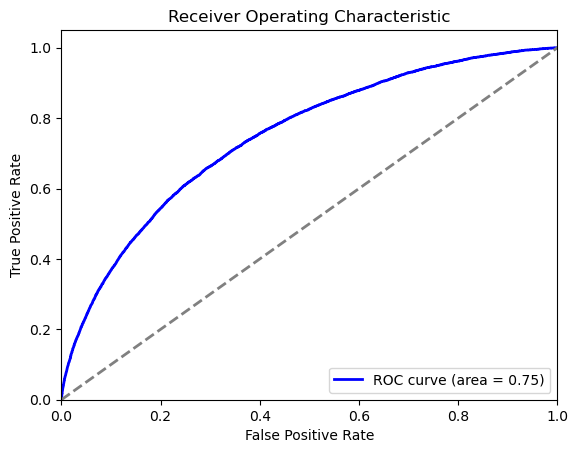

In [37]:
y_pred = lgr_rus.predict(X_test)
y_pred_proba = lgr_rus.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [85]:
X_rus_new,y_rus_new=rus.fit_resample(X_train_new,y_train_new)

lgr=LogisticRegression()
lgr.fit(X_rus_new,y_rus_new)

y_pred=lgr.predict(X_test_new)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))


accuracy:  0.6671334480507921
precision:  0.21262080727686186
f1_score:  0.3243321369209645
recall:  0.6833823977261192
auc:  0.6741823967559293


# LOGISTIC WITH SMOTE

In [47]:
from imblearn.over_sampling import SMOTENC

In [48]:
data_scaled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,0,1,0
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,0,0,0,0,1,0
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,1,0,1
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,0,0,0
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,1,0,0


In [54]:
data_scaled.columns[9:16]

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [57]:
cat_features=['Education','EmploymentType', 'MaritalStatus', 
              'HasMortgage', 'HasDependents','LoanPurpose', 'HasCoSigner']
smt=SMOTENC(random_state=42,categorical_features=np.arange(9,16,1))

In [63]:
X_smote,y_smote=smt.fit_resample(X_train,y_train)

lgr_smote=LogisticRegression()
lgr_smote.fit(X_smote,y_smote)

y_pred=lgr_smote.predict(X_test)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))

accuracy:  0.6898712395419213
precision:  0.21544914365606432
f1_score:  0.3205324874548244
recall:  0.6257232768246879
auc:  0.6620432440241911


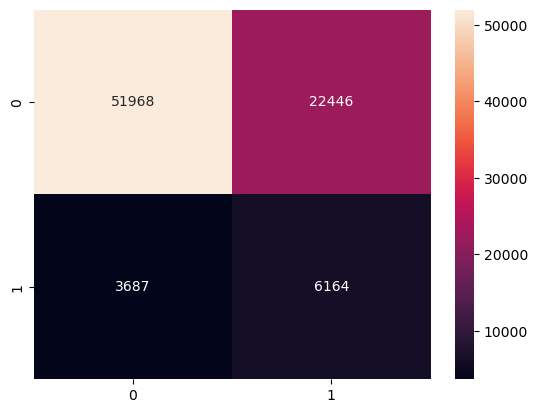

In [64]:
cfc=confusion_matrix(y_test,y_pred)
sns.heatmap(cfc,fmt='.0f',annot=True)
plt.show()

In [88]:
smt=SMOTENC(random_state=42,categorical_features=np.arange(5,6))
X_smt_new,y_smt_new=smt.fit_resample(X_train_new,y_train_new)

lgr=LogisticRegression()
lgr.fit(X_smt_new,y_smt_new)

y_pred=lgr.predict(X_test_new)

print('accuracy: ',accuracy_score(y_test,y_pred))
print('precision: ',precision_score(y_test,y_pred))
print('f1_score: ',f1_score(y_test,y_pred))
print('recall: ',recall_score(y_test,y_pred))
print('auc: ',roc_auc_score(y_test,y_pred))


accuracy:  0.6697442591823414
precision:  0.2137078794827696
f1_score:  0.32534122039322166
recall:  0.6811491219165567
auc:  0.6746917969622562
